In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_59197/2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
filename = "LA_AQS_2023.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename) 

In [3]:
# Filter for ozone and NO2
df_o3 = df[(df['Parameter Name']== 'Ozone')]
o3value = df_o3['Arithmetic Mean'] * 1000 #ppb 

df_no2 = df[(df['Parameter Name']== 'Nitrogen dioxide (NO2)')]
no2value = df_no2['Arithmetic Mean'] 

In [4]:
# Set theme
sns.set_theme(style = 'whitegrid', font_scale=1.25)

Text(0, 0.5, 'Count')

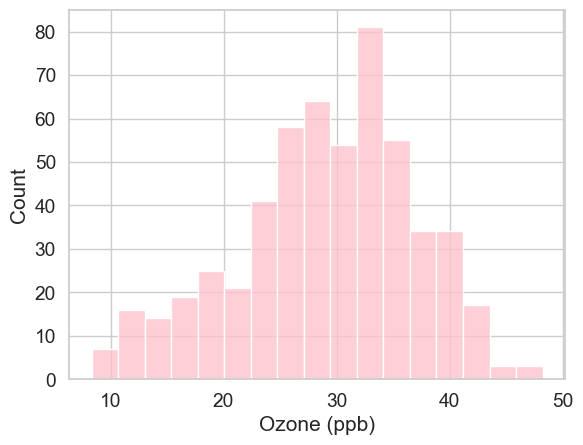

In [5]:
hPlot = sns.histplot(data=o3value, color = 'pink')
hPlot.set_xlabel('Ozone (ppb)')
hPlot.set_ylabel('Count')
# hPlot.set_title('Histogram of Ozone Values')

In [ ]:
# The histogram shows that the majority of ozone sensors in the Los Angeles area are collecting ozone data points around 32 ppb. 
# This suggests that the ozone concentration in the Los Angeles area is usually between 25-35ppb.

Text(0, 0.5, 'Density')

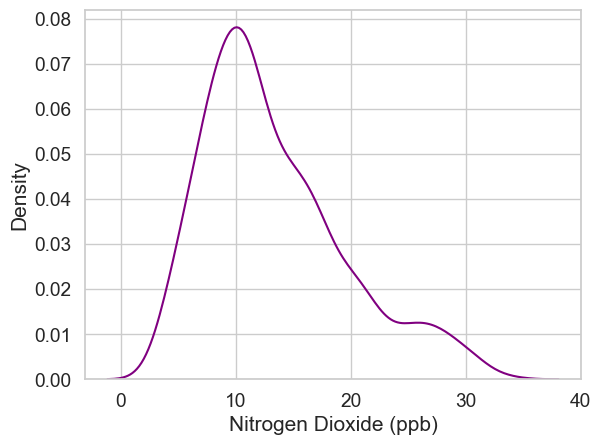

In [6]:
dPlot = sns.kdeplot(data=no2value, color = 'purple')
dPlot.set_xlabel('Nitrogen Dioxide (ppb)')
dPlot.set_ylabel('Density')

In [ ]:
# The density plots suggests that the NO2 concentrations in Los Angeles are typically around 10ppb. It is more common that the concentration
# of NO2, if it is not 10ppb, would be greater than 10ppb rather than less than.

In [7]:
df_o3 = df[(df['Parameter Name']== 'Ozone') & (df['Duration Description']== '1 HOUR')]

# Fix date
# df_o3['Date (Local)']= pd.to_datetime(df_o3['Date (Local)']) 

o3date = df_o3['Date (Local)']
o3obs = df_o3['Arithmetic Mean'] *1000 #ppb

df_1 = pd.DataFrame(data = {'Ozone':o3obs, 'date': o3date})


In [8]:
df_no2 = df[(df['Parameter Name']== 'Nitrogen dioxide (NO2)') & (df['Duration Description']== '1 HOUR')]

# Fix date
# df_no2['Date (Local)']= pd.to_datetime(df_o3['Date (Local)']) 

no2date = df_no2['Date (Local)']
no2obs = df_no2['Arithmetic Mean'] # ppb

df_2 = pd.DataFrame(data = {'Nitrogen Dioxide (NO2)':no2obs, 'date': no2date})


In [9]:
# Merge Data
df_all = df_1.merge(df_2,on=['date'])


[Text(0.5, 0, 'NO2 (ppb)'), Text(0, 0.5, 'Ozone (ppb)')]

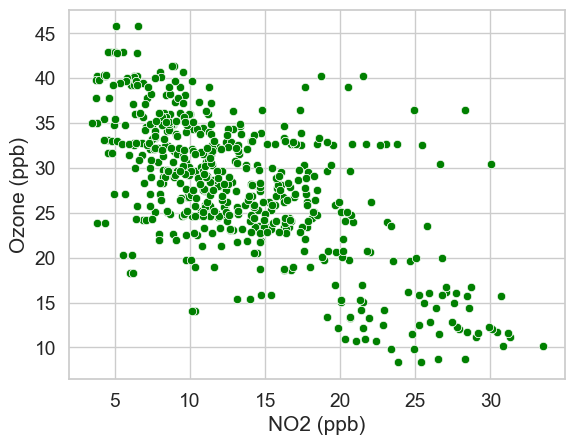

In [31]:
sPlot = sns.scatterplot(data = df_all, x = 'Nitrogen Dioxide (NO2)', y = 'Ozone', color = 'green')
sPlot.set(xlabel ="NO2 (ppb)", ylabel = "Ozone (ppb)")

In [ ]:
# The scatterplot shows a inverse relationship between ozone and nitrogen dioxide concentrations in the Los Angeles area; if NO2 concentrations
# were particularly high, the ozone concentration tended to be lower. There is, however, more instances in 2023 that low NO2 concentrations coincided
# with high ozone concentrations.

/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_59197/1412594187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over35['date'] = pd.to_datetime(over35.date, format='%Y-%m-%d')


[Text(0, 0.5, 'Days over 35ppb O3'), Text(0.5, 0, 'Month')]

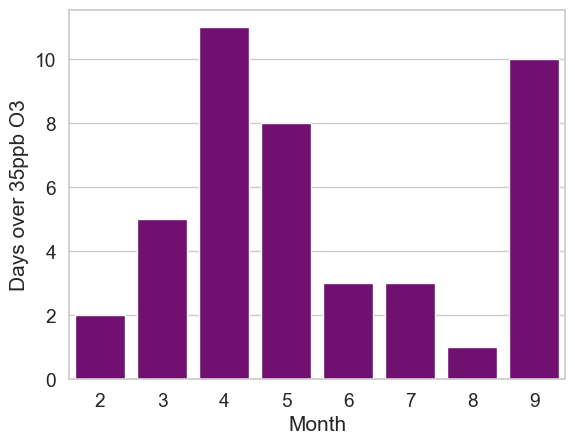

In [33]:
over35 = df_1[df_1['Ozone'] > (35)]
over35['date'] = pd.to_datetime(over35.date, format='%Y-%m-%d')
monthly_o3 = over35.groupby(over35.date.dt.month)['Ozone'].count()

bPlot = sns.barplot(data = monthly_o3, color = 'purple',)
bPlot.set(ylabel = 'Days over 35ppb O3', xlabel = 'Month')


In [ ]:
# This bar graph shows that the month that witnessed the most instances of ozone concentrations over 35ppb was April 2023 (11 days to be exact). 
# September saw 10 days with ozone concentrations over 35ppb.

date
2     2
3     5
4    11
5     8
6     3
7     3
8     1
9    10
Name: Ozone, dtype: int64

In [40]:
# Read in Mauna Loa csv
filename = "ManuaLoa_CO2.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename)
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Monthly Average [CO2] (ppm)')]

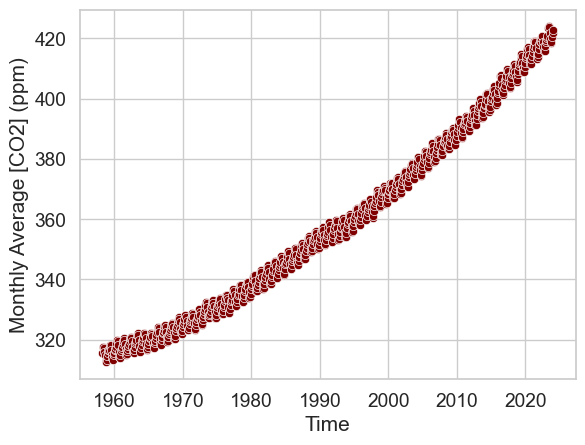

In [49]:
cPlot = sns.scatterplot(data = df, x ='decimal date', y = 'average', color = 'maroon')
cPlot.set(xlabel = 'Time', ylabel = 'Monthly Average [CO2] (ppm)')

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Monthly Average [CO2] (ppm)')]

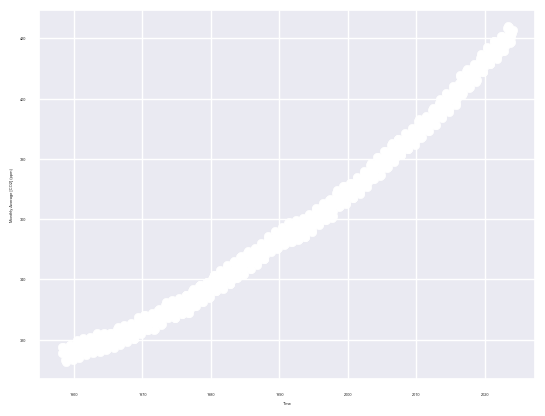

In [60]:
sns.set(font_scale=0.25)
cPlot = sns.scatterplot(data = df, x ='decimal date', y = 'average', color = 'white')
cPlot.set(xlabel = 'Time', ylabel = 'Monthly Average [CO2] (ppm)')